In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/Users/Anirudh MV/Downloads/EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#### Min and max

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = data.iloc[:,:1]

In [5]:
norm = MinMaxScaler()

In [6]:
norm.fit(data)

MinMaxScaler()

In [7]:
norm_data = norm.transform(data)
print(norm_data)

[[0.00000000e+00]
 [2.48756219e-04]
 [4.97512438e-04]
 ...
 [9.99502488e-01]
 [9.99751244e-01]
 [1.00000000e+00]]


In [8]:
type(norm_data)

numpy.ndarray

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [10]:
k_mean = list(range(2,20))

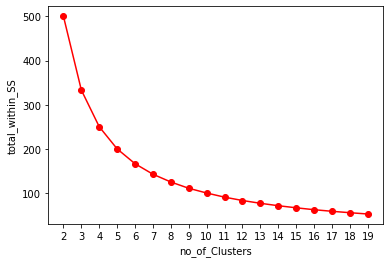

In [12]:
k_mean
TWSS = []
for i in k_mean:
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    WSS = []
    for j in range(i):
       j
       WSS.append(sum(cdist(norm_data[kmeans.labels_==j,:],
         kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
plt.plot(k_mean,TWSS, 'ro-')
plt.xlabel("no_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k_mean)
plt.show()

In [18]:
model = KMeans(n_clusters = 5)
model.fit(norm_data)

KMeans(n_clusters=5)

In [19]:
model.labels_
series_array=pd.Series(model.labels_)
data["clust"]=series_array
cluster1= data.iloc[:,1:11].groupby(data.clust).mean()

In [20]:
cluster1

,clust
clust,
0,0
1,1
2,2
3,3
4,4
